In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.api as sm



df = pd.read_csv("student_habits_performance.csv")

warnings.filterwarnings('ignore')
df['parental_education_level'] = df['parental_education_level'].fillna('None')

if 'student_id' in df.columns:
    df = df.drop(['student_id'], axis=1)


print("### SAYISAL DEĞİŞKENLERİN İSTATİSTİKLERİ ###")
print(df.describe().T)


print("\n### KATEGORİK DEĞİŞKENLERİN DAĞILIMI ###")
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\n--- {col} ---")
    print(df[col].value_counts())

### SAYISAL DEĞİŞKENLERİN İSTATİSTİKLERİ ###
                        count     mean        std   min     25%   50%     75%  \
age                    1000.0  20.4980   2.308100  17.0  18.750  20.0  23.000   
study_hours_per_day    1000.0   3.5501   1.468890   0.0   2.600   3.5   4.500   
social_media_hours     1000.0   2.5055   1.172422   0.0   1.700   2.5   3.300   
netflix_hours          1000.0   1.8197   1.075118   0.0   1.000   1.8   2.525   
attendance_percentage  1000.0  84.1317   9.399246  56.0  78.000  84.4  91.025   
sleep_hours            1000.0   6.4701   1.226377   3.2   5.600   6.5   7.300   
exercise_frequency     1000.0   3.0420   2.025423   0.0   1.000   3.0   5.000   
mental_health_rating   1000.0   5.4380   2.847501   1.0   3.000   5.0   8.000   
exam_score             1000.0  69.6015  16.888564  18.4  58.475  70.5  81.325   

                         max  
age                     24.0  
study_hours_per_day      8.3  
social_media_hours       7.2  
netflix_hours       

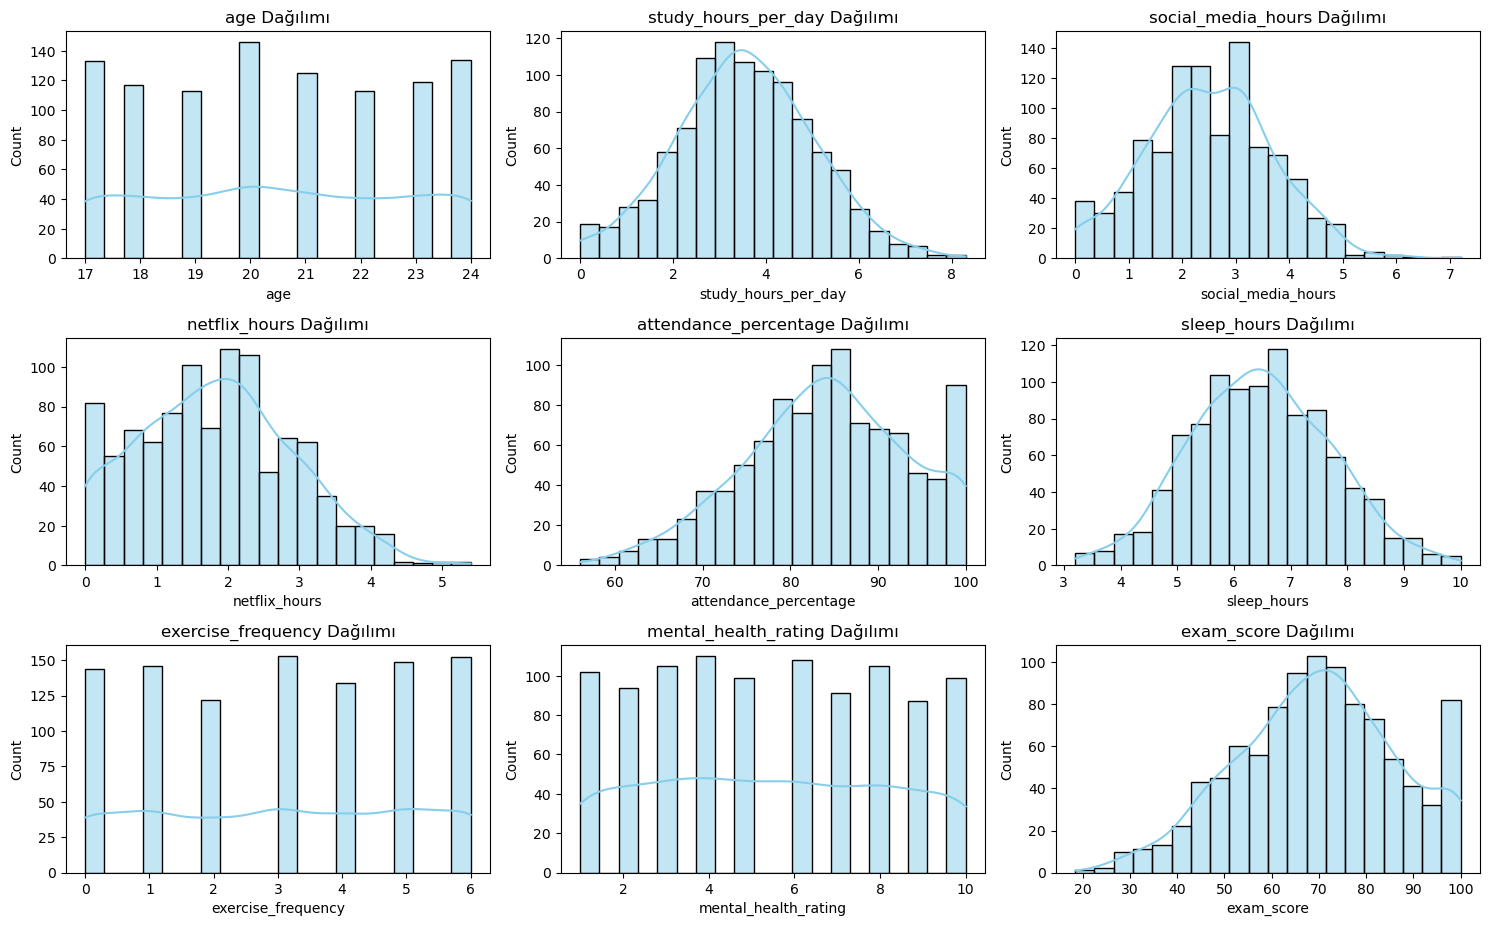

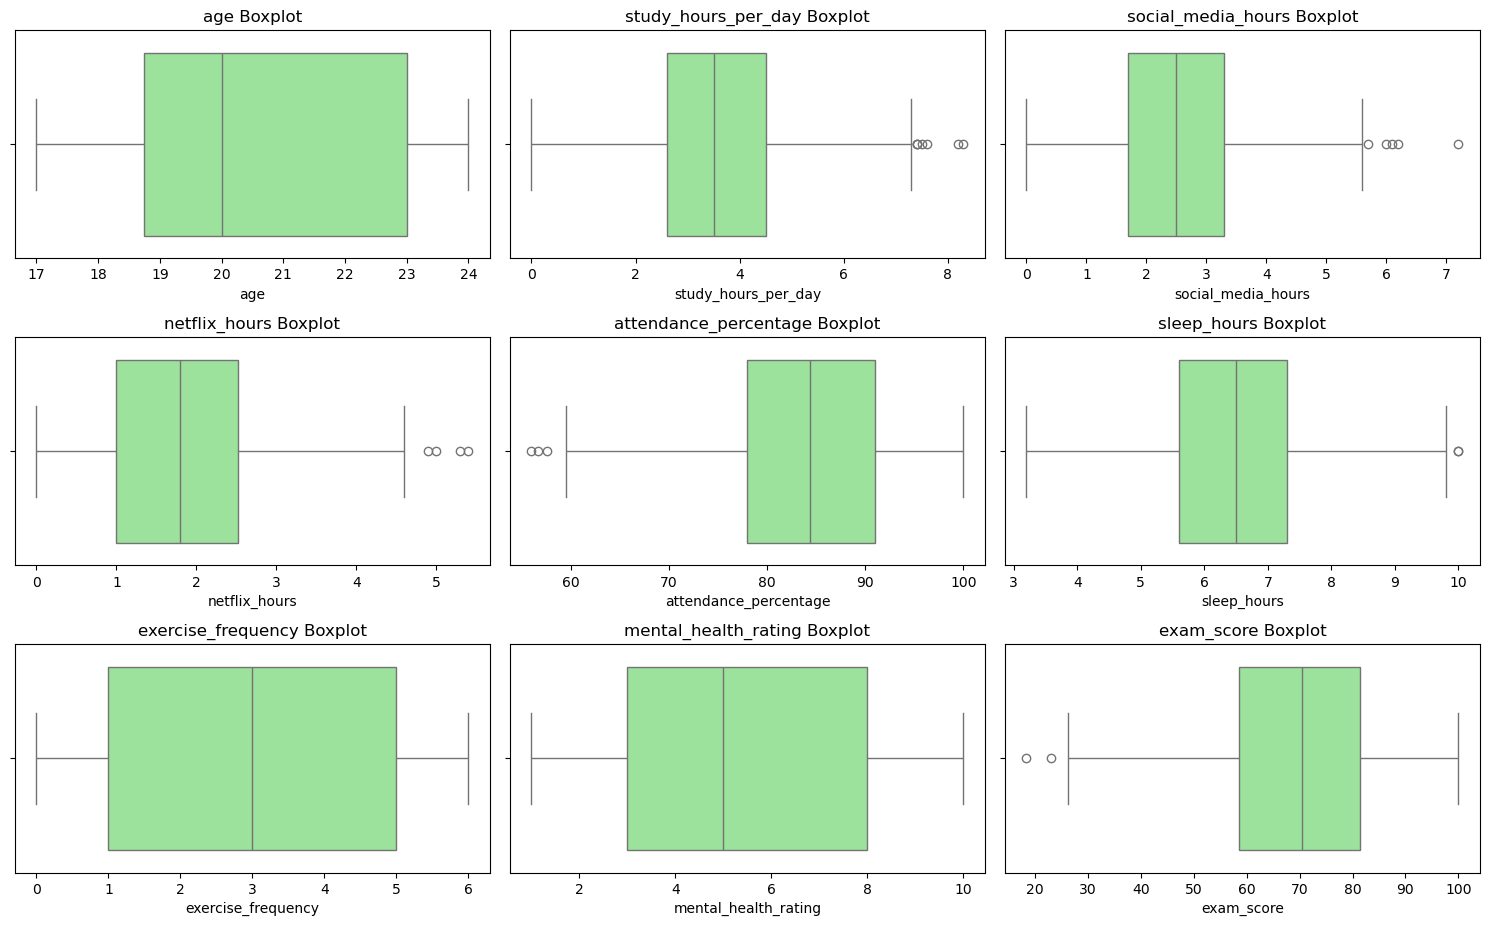

In [7]:

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns


plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_cols):
    plt.subplot(4, 3, i+1)
    sns.histplot(df[col], kde=True, bins=20, color='skyblue')
    plt.title(f'{col} Dağılımı')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_cols):
    plt.subplot(4, 3, i+1)
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'{col} Boxplot')
plt.tight_layout()
plt.show()

In [8]:
# Encoding
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.columns = df_encoded.columns.str.replace(' ', '_').str.replace('-', '_')
df_encoded = df_encoded.astype(float)

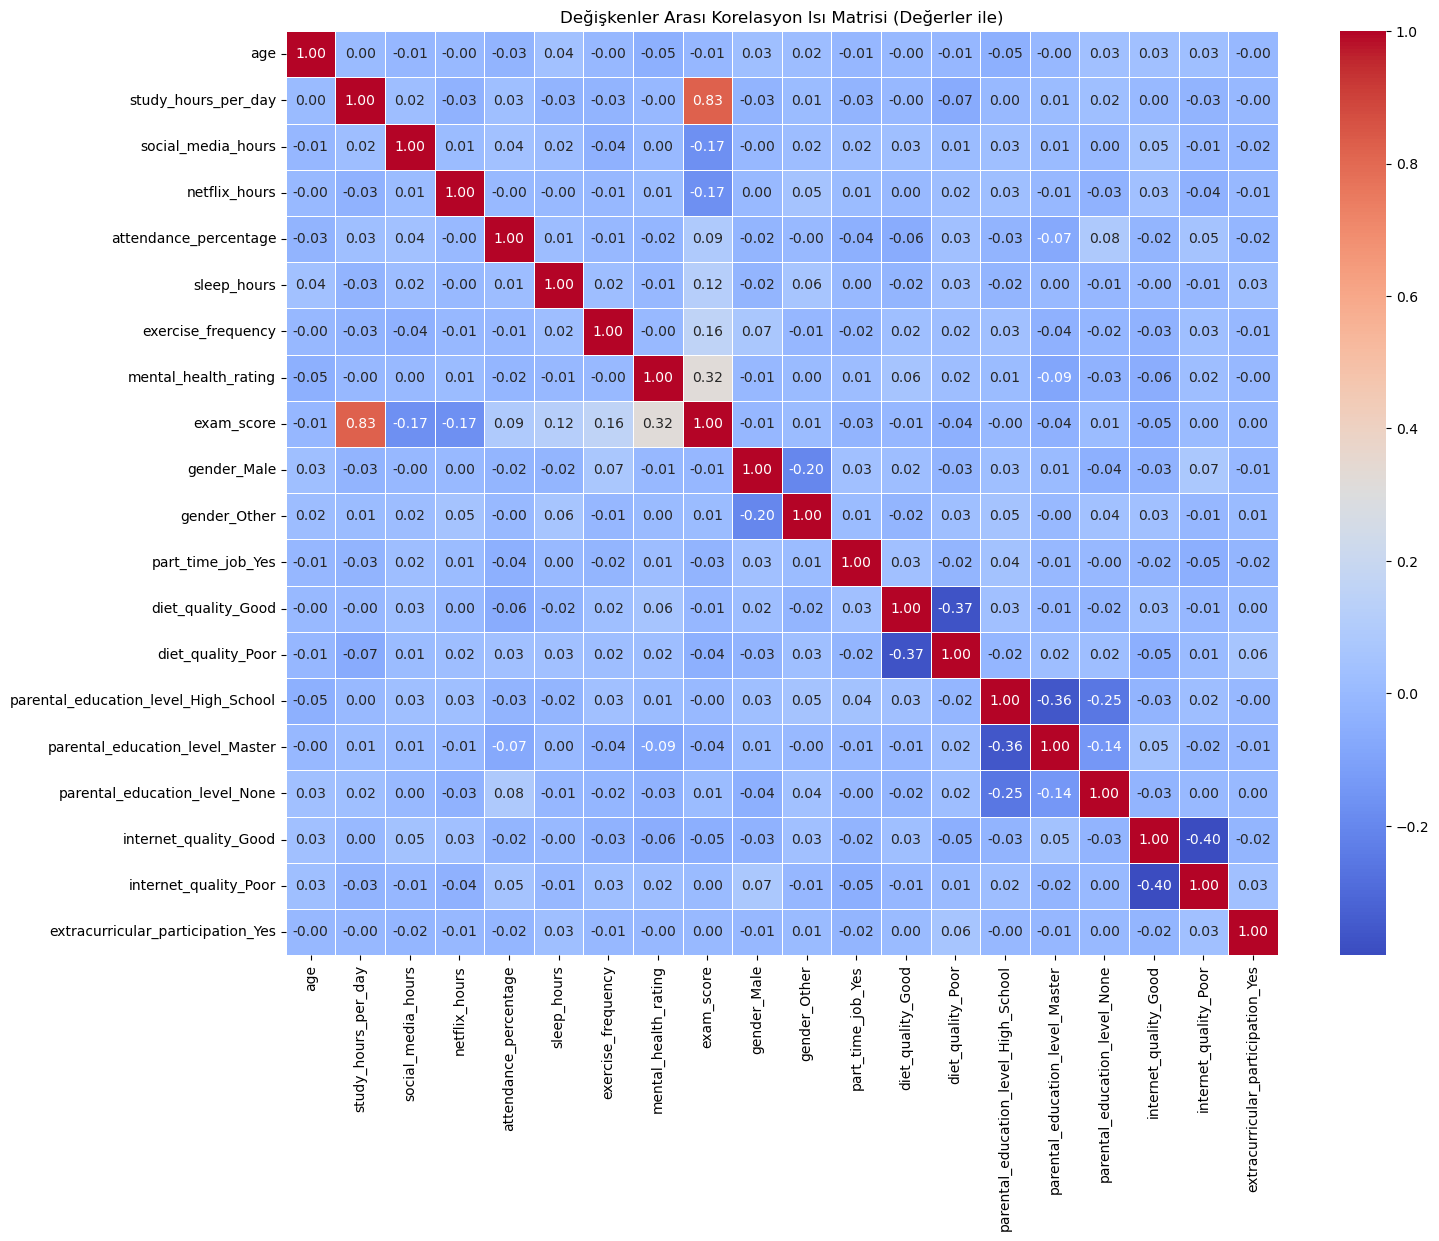

In [9]:

plt.figure(figsize=(16, 12)) 
correlation_matrix = df_encoded.corr()

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

plt.title('Değişkenler Arası Korelasyon Isı Matrisi (Değerler ile)')
plt.show()

# Tam Model

In [10]:



df['parental_education_level'] = df['parental_education_level'].fillna('None')


df_encoded = pd.get_dummies(df, drop_first=True)


df_encoded.columns = df_encoded.columns.str.replace(' ', '_').str.replace('-', '_')


df_encoded = df_encoded.astype(float)

print("Veri ön işleme tamamlandı.")
print(f"Orijinal Sütun Sayısı: {df.shape[1]}")
print(f"Encoded (İşlenmiş) Sütun Sayısı: {df_encoded.shape[1]}")
print("-" * 30)



y = df_encoded['exam_score']
X = df_encoded.drop(['exam_score'], axis=1)


X = sm.add_constant(X)


try:
    model_full = sm.OLS(y, X).fit()
    
    
    print("\n### TAM MODEL (FULL MODEL) ÖZETİ ###")
    print(model_full.summary())
    
except Exception as e:
    print("Hata oluştu:", e)

Veri ön işleme tamamlandı.
Orijinal Sütun Sayısı: 15
Encoded (İşlenmiş) Sütun Sayısı: 20
------------------------------

### TAM MODEL (FULL MODEL) ÖZETİ ###
                            OLS Regression Results                            
Dep. Variable:             exam_score   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     473.9
Date:                Sat, 20 Dec 2025   Prob (F-statistic):               0.00
Time:                        17:17:46   Log-Likelihood:                -3084.5
No. Observations:                1000   AIC:                             6209.
Df Residuals:                     980   BIC:                             6307.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                           coef    s

In [11]:

anova_df = pd.DataFrame({
    'Source': ['Model (Regression)', 'Residual (Error)', 'Total'],
    'Sum of Squares (SS)': [model_full.ess, model_full.ssr, model_full.ess + model_full.ssr],
    'df': [model_full.df_model, model_full.df_resid, model_full.df_model + model_full.df_resid],
    'Mean Square (MS)': [model_full.mse_model, model_full.mse_resid, np.nan],
    'F': [model_full.fvalue, np.nan, np.nan],
    'Prob (F)': [model_full.f_pvalue, np.nan, np.nan]
})


pd.options.display.float_format = '{:,.4f}'.format
print("### ANOVA TABLOSU ###")
print(anova_df)



from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Değişken"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data = vif_data.sort_values(by="VIF", ascending=False)

print("\n### VIF DEĞERLERİ ###")
print(vif_data)

### ANOVA TABLOSU ###
               Source  Sum of Squares (SS)       df  Mean Square (MS)  \
0  Model (Regression)         256,970.3834  19.0000       13,524.7570   
1    Residual (Error)          27,967.9843 980.0000           28.5388   
2               Total         284,938.3677 999.0000               NaN   

         F  Prob (F)  
0 473.9084    0.0000  
1      NaN       NaN  
2      NaN       NaN  

### VIF DEĞERLERİ ###
                                Değişken      VIF
0                                  const 219.4619
14  parental_education_level_High_School   1.3099
15       parental_education_level_Master   1.2570
18                 internet_quality_Poor   1.2047
17                 internet_quality_Good   1.2046
13                     diet_quality_Poor   1.1823
12                     diet_quality_Good   1.1757
16         parental_education_level_None   1.1619
9                            gender_Male   1.0589
10                          gender_Other   1.0563
5                  a

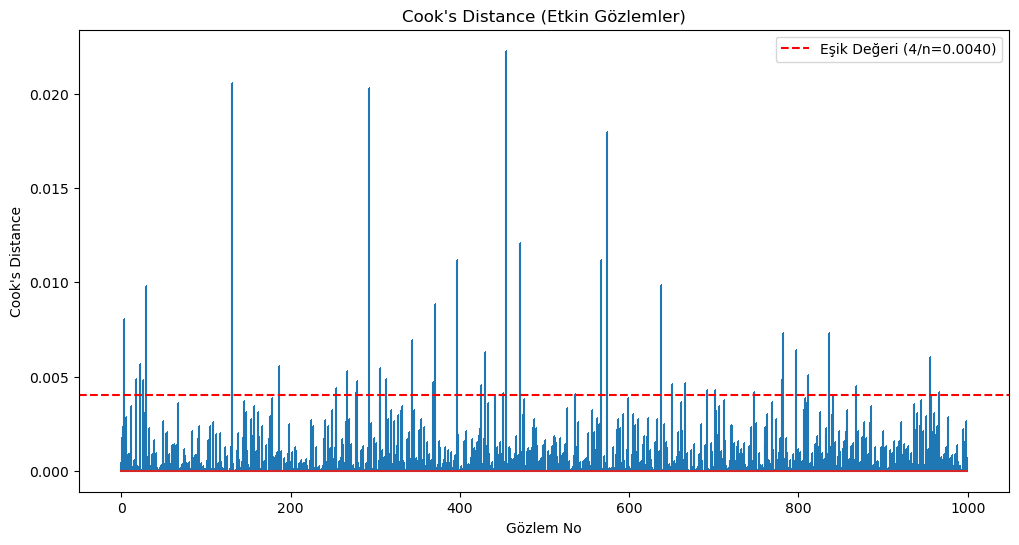

### TOPLAM ETKİN GÖZLEM SAYISI: 41 ###

En yüksek Cook's Distance değerine sahip ilk 5 gözlem:
     cooks_d  standard_resid  hat_diag
455   0.0223         -4.2094    0.0245
131   0.0206         -3.9803    0.0253
293   0.0203         -4.1727    0.0228
574   0.0180          2.7546    0.0453
471   0.0121         -3.5627    0.0187


In [12]:

influence = model_full.get_influence()
summary_frame = influence.summary_frame()



(c, p) = influence.cooks_distance
plt.figure(figsize=(12, 6))
plt.stem(np.arange(len(c)), c, markerfmt=",")
plt.title("Cook's Distance (Etkin Gözlemler)")
plt.xlabel("Gözlem No")
plt.ylabel("Cook's Distance")


n = len(df)
threshold = 4/n
plt.axhline(y=threshold, color='r', linestyle='--', label=f'Eşik Değeri (4/n={threshold:.4f})')
plt.legend()
plt.show()


outliers = summary_frame[summary_frame['cooks_d'] > threshold]
print(f"### TOPLAM ETKİN GÖZLEM SAYISI: {len(outliers)} ###")
print("\nEn yüksek Cook's Distance değerine sahip ilk 5 gözlem:")
print(outliers[['cooks_d', 'standard_resid', 'hat_diag']].sort_values(by='cooks_d', ascending=False).head())

# Değişken Seçimi

In [13]:

def stepwise_selection(X, y, initial_list=[], threshold_in=0.05, threshold_out=0.05, verbose=True):
    included = list(initial_list)
    print("### STEPWISE SELECTION BAŞLIYOR ###")
    while True:
        changed = False
        
        
        excluded = list(set(X.columns) - set(included))
        new_pval = pd.Series(index=excluded, dtype='float64')
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included + [new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        
        if not new_pval.empty:
            best_pval = new_pval.min()
            if best_pval < threshold_in:
                best_feature = new_pval.idxmin()
                included.append(best_feature)
                changed = True
                if verbose:
                    print(f"EKLENDİ: {best_feature:<30} (p-value: {best_pval:.6f})")

        
        if included: # Modelde değişken varsa kontrol et
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
            # Sabit terim (const) hariç p değerlerine bak
            pvalues = model.pvalues.drop('const') if 'const' in model.pvalues else model.pvalues
            
            if not pvalues.empty:
                worst_pval = pvalues.max()
                if worst_pval > threshold_out:
                    changed = True
                    worst_feature = pvalues.idxmax()
                    included.remove(worst_feature)
                    if verbose:
                        print(f"ÇIKARILDI: {worst_feature:<30} (p-value: {worst_pval:.6f})")

        if not changed:
            break
            
    print("### SEÇİM TAMAMLANDI ###\n")
    return included


selected_features_stepwise = stepwise_selection(X, y)


X_final = sm.add_constant(X[selected_features_stepwise])
model_stepwise = sm.OLS(y, X_final).fit()

print("### OLS STEPWISE FİNAL MODEL ÖZETİ ###")
print(model_stepwise.summary())

### STEPWISE SELECTION BAŞLIYOR ###
EKLENDİ: const                          (p-value: 0.000000)
EKLENDİ: study_hours_per_day            (p-value: 0.000000)
EKLENDİ: mental_health_rating           (p-value: 0.000000)
EKLENDİ: social_media_hours             (p-value: 0.000000)
EKLENDİ: exercise_frequency             (p-value: 0.000000)
EKLENDİ: sleep_hours                    (p-value: 0.000000)
EKLENDİ: netflix_hours                  (p-value: 0.000000)
EKLENDİ: attendance_percentage          (p-value: 0.000000)
### SEÇİM TAMAMLANDI ###

### OLS STEPWISE FİNAL MODEL ÖZETİ ###
                            OLS Regression Results                            
Dep. Variable:             exam_score   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     1291.
Date:                Sat, 20 Dec 2025   Prob (F-statistic):               0.00
Time:                   

In [14]:
cols = list(X.columns)
elimination_data = [] 
step = 1

while len(cols) > 0:
    X_1 = X[cols]
    model = sm.OLS(y, X_1).fit()
    p = pd.Series(model.pvalues.values, index=cols)
    
    
    if 'const' in p:
        p = p.drop('const')
        
    if p.empty:
        break

    pmax = p.max()
    feature_with_p_max = p.idxmax()
    
    if (pmax > 0.05):
        
        elimination_data.append({
            "Adım": step,
            "Çıkarılan Değişken": feature_with_p_max,
            "P-Değeri": f"{pmax:.4f}" # 4 basamak yuvarla
        })
        
        
        cols.remove(feature_with_p_max)
        step += 1
    else:
        break 


df_elimination = pd.DataFrame(elimination_data)

print("### DEĞİŞKEN ELEME TABLOSU (Backward Elimination Steps) ###")
# Tabloyu güzel bir formatta yazdır
print(df_elimination.to_string(index=False))


print("\n" + "="*50 + "\n")
print("### FİNAL MODEL ÖZETİ ###")

final_model = sm.OLS(y, X[cols]).fit()
print(final_model.summary())

### DEĞİŞKEN ELEME TABLOSU (Backward Elimination Steps) ###
 Adım                   Çıkarılan Değişken P-Değeri
    1    extracurricular_participation_Yes   0.9691
    2                internet_quality_Poor   0.8702
    3                                  age   0.8644
    4 parental_education_level_High_School   0.6904
    5                          gender_Male   0.6939
    6                    part_time_job_Yes   0.6005
    7                    diet_quality_Poor   0.5515
    8      parental_education_level_Master   0.4690
    9                         gender_Other   0.4149
   10        parental_education_level_None   0.3468
   11                internet_quality_Good   0.1968
   12                    diet_quality_Good   0.0817


### FİNAL MODEL ÖZETİ ###
                            OLS Regression Results                            
Dep. Variable:             exam_score   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.900

In [15]:

def forward_selection(X, y, threshold_in=0.05):
    initial_features = []
    best_features = list(initial_features)
    print("### STEP FORWARD SELECTION (İleriye Doğru) BAŞLIYOR ###")
    while True:
        remaining_features = list(set(X.columns) - set(best_features))
        new_pval = pd.Series(index=remaining_features, dtype='float64')
        for new_column in remaining_features:
            model = sm.OLS(y, sm.add_constant(X[best_features + [new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        
        if new_pval.empty:
            break
            
        min_p_value = new_pval.min()
        if min_p_value < threshold_in:
            best_feature = new_pval.idxmin()
            best_features.append(best_feature)
            print(f"EKLENDİ: {best_feature:<35} (p-value: {min_p_value:.6f})")
        else:
            break
    print("### FORWARD SEÇİM TAMAMLANDI ###\n")
    return best_features


def backward_elimination(X, y, threshold_out=0.05):
    features = X.columns.tolist()
    print("### STEP BACKWARD ELIMINATION (Geriye Doğru) BAŞLIYOR ###")
    while len(features) > 0:
        model = sm.OLS(y, sm.add_constant(X[features])).fit()
        p_values = model.pvalues.drop('const')
        max_p_value = p_values.max()
        if max_p_value > threshold_out:
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
            print(f"ÇIKARILDI: {excluded_feature:<35} (p-value: {max_p_value:.6f})")
        else:
            break
    print("### BACKWARD SEÇİM TAMAMLANDI ###\n")
    return features


selected_fwd = forward_selection(X, y)
selected_bwd = backward_elimination(X, y)

print("### SONUÇ KARŞILAŞTIRMASI ###")
print(f"Forward ile Seçilenler ({len(selected_fwd)} değişken): {selected_fwd}")
print(f"Backward ile Seçilenler ({len(selected_bwd)} değişken): {selected_bwd}")


common = set(selected_fwd).intersection(set(selected_bwd))
print(f"Ortak Değişkenler: {common}")


if set(selected_fwd) == set(selected_bwd):
    print("\nSONUÇ: İki yöntem de AYNI değişkenleri seçti.")
else:
    print("\nSONUÇ: Yöntemler FARKLI değişkenler seçti.")

### STEP FORWARD SELECTION (İleriye Doğru) BAŞLIYOR ###
EKLENDİ: const                               (p-value: 0.000000)
EKLENDİ: study_hours_per_day                 (p-value: 0.000000)
EKLENDİ: mental_health_rating                (p-value: 0.000000)
EKLENDİ: social_media_hours                  (p-value: 0.000000)
EKLENDİ: exercise_frequency                  (p-value: 0.000000)
EKLENDİ: sleep_hours                         (p-value: 0.000000)
EKLENDİ: netflix_hours                       (p-value: 0.000000)
EKLENDİ: attendance_percentage               (p-value: 0.000000)
### FORWARD SEÇİM TAMAMLANDI ###

### STEP BACKWARD ELIMINATION (Geriye Doğru) BAŞLIYOR ###
ÇIKARILDI: extracurricular_participation_Yes   (p-value: 0.969091)
ÇIKARILDI: internet_quality_Poor               (p-value: 0.870175)
ÇIKARILDI: age                                 (p-value: 0.864449)
ÇIKARILDI: parental_education_level_High_School (p-value: 0.690441)
ÇIKARILDI: gender_Male                         (p-value: 0.6939

In [16]:

import itertools
selected_pool = [
    'study_hours_per_day', 
    'social_media_hours', 
    'netflix_hours', 
    'attendance_percentage', 
    'sleep_hours', 
    'exercise_frequency', 
    'mental_health_rating'
]

X_pool = df_encoded[selected_pool]
X_pool = sm.add_constant(X_pool)


results = []
features = [col for col in X_pool.columns if col != 'const']

print(f"Havuzdaki Değişkenler ({len(features)} adet): {features}")
print("\n--- EN İYİ ALT KÜME ANALİZİ BAŞLIYOR ---")

for k in range(1, len(features) + 1): # 1'den 7'ye kadar
    best_score = -np.inf
    best_stats = None
    
    
    for combo in itertools.combinations(features, k):
        X_subset = X_pool[list(combo) + ['const']]
        model = sm.OLS(y, X_subset).fit()
        
        if model.rsquared_adj > best_score:
            best_score = model.rsquared_adj
            best_stats = {
                'k': k,
                'Adj. R2': model.rsquared_adj,
                'AIC': model.aic,
                'BIC': model.bic,
                'Seçilen Değişkenler': list(combo)
            }
    
    results.append(best_stats)
    print(f"k={k} için en iyi model bulundu. (Adj. R2: {best_score:.4f})")


df_results = pd.DataFrame(results)
pd.set_option('display.max_colwidth', None)

print("\n### BEST SUBSET SONUÇLARI (Düzeltilmiş Tablo) ###\n")
print(f"{'k':<3} | {'Adj. R2':<8} | {'AIC':<8} | {'BIC':<8} | {'Seçilen Değişkenler'}")
print("-" * 120)
for res in results:
    vars_str = ", ".join(res['Seçilen Değişkenler'])
    print(f"{res['k']:<3} | {res['Adj. R2']:<8.4f} | {res['AIC']:<8.1f} | {res['BIC']:<8.1f} | {vars_str}")

Havuzdaki Değişkenler (7 adet): ['study_hours_per_day', 'social_media_hours', 'netflix_hours', 'attendance_percentage', 'sleep_hours', 'exercise_frequency', 'mental_health_rating']

--- EN İYİ ALT KÜME ANALİZİ BAŞLIYOR ---
k=1 için en iyi model bulundu. (Adj. R2: 0.6810)
k=2 için en iyi model bulundu. (Adj. R2: 0.7863)
k=3 için en iyi model bulundu. (Adj. R2: 0.8200)
k=4 için en iyi model bulundu. (Adj. R2: 0.8514)
k=5 için en iyi model bulundu. (Adj. R2: 0.8729)
k=6 için en iyi model bulundu. (Adj. R2: 0.8940)
k=7 için en iyi model bulundu. (Adj. R2: 0.9004)

### BEST SUBSET SONUÇLARI (Düzeltilmiş Tablo) ###

k   | Adj. R2  | AIC      | BIC      | Seçilen Değişkenler
------------------------------------------------------------------------------------------------------------------------
1   | 0.6810   | 7350.6   | 7360.4   | study_hours_per_day
2   | 0.7863   | 6951.1   | 6965.8   | study_hours_per_day, mental_health_rating
3   | 0.8200   | 6780.2   | 6799.8   | study_hours_per_day, so

In [17]:
print(final_model.summary())

                            OLS Regression Results                            
Dep. Variable:             exam_score   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     1291.
Date:                Sat, 20 Dec 2025   Prob (F-statistic):               0.00
Time:                        17:17:48   Log-Likelihood:                -3088.4
No. Observations:                1000   AIC:                             6193.
Df Residuals:                     992   BIC:                             6232.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     6.15

# Varsayım Kontrolleri

In [18]:

import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.stattools import jarque_bera, durbin_watson

final_features = [
    'study_hours_per_day', 
    'social_media_hours', 
    'netflix_hours', 
    'attendance_percentage', 
    'sleep_hours', 
    'exercise_frequency', 
    'mental_health_rating'
]

X_final = sm.add_constant(df_encoded[final_features])
final_model = sm.OLS(y, X_final).fit()
residuals = final_model.resid
fitted_values = final_model.fittedvalues

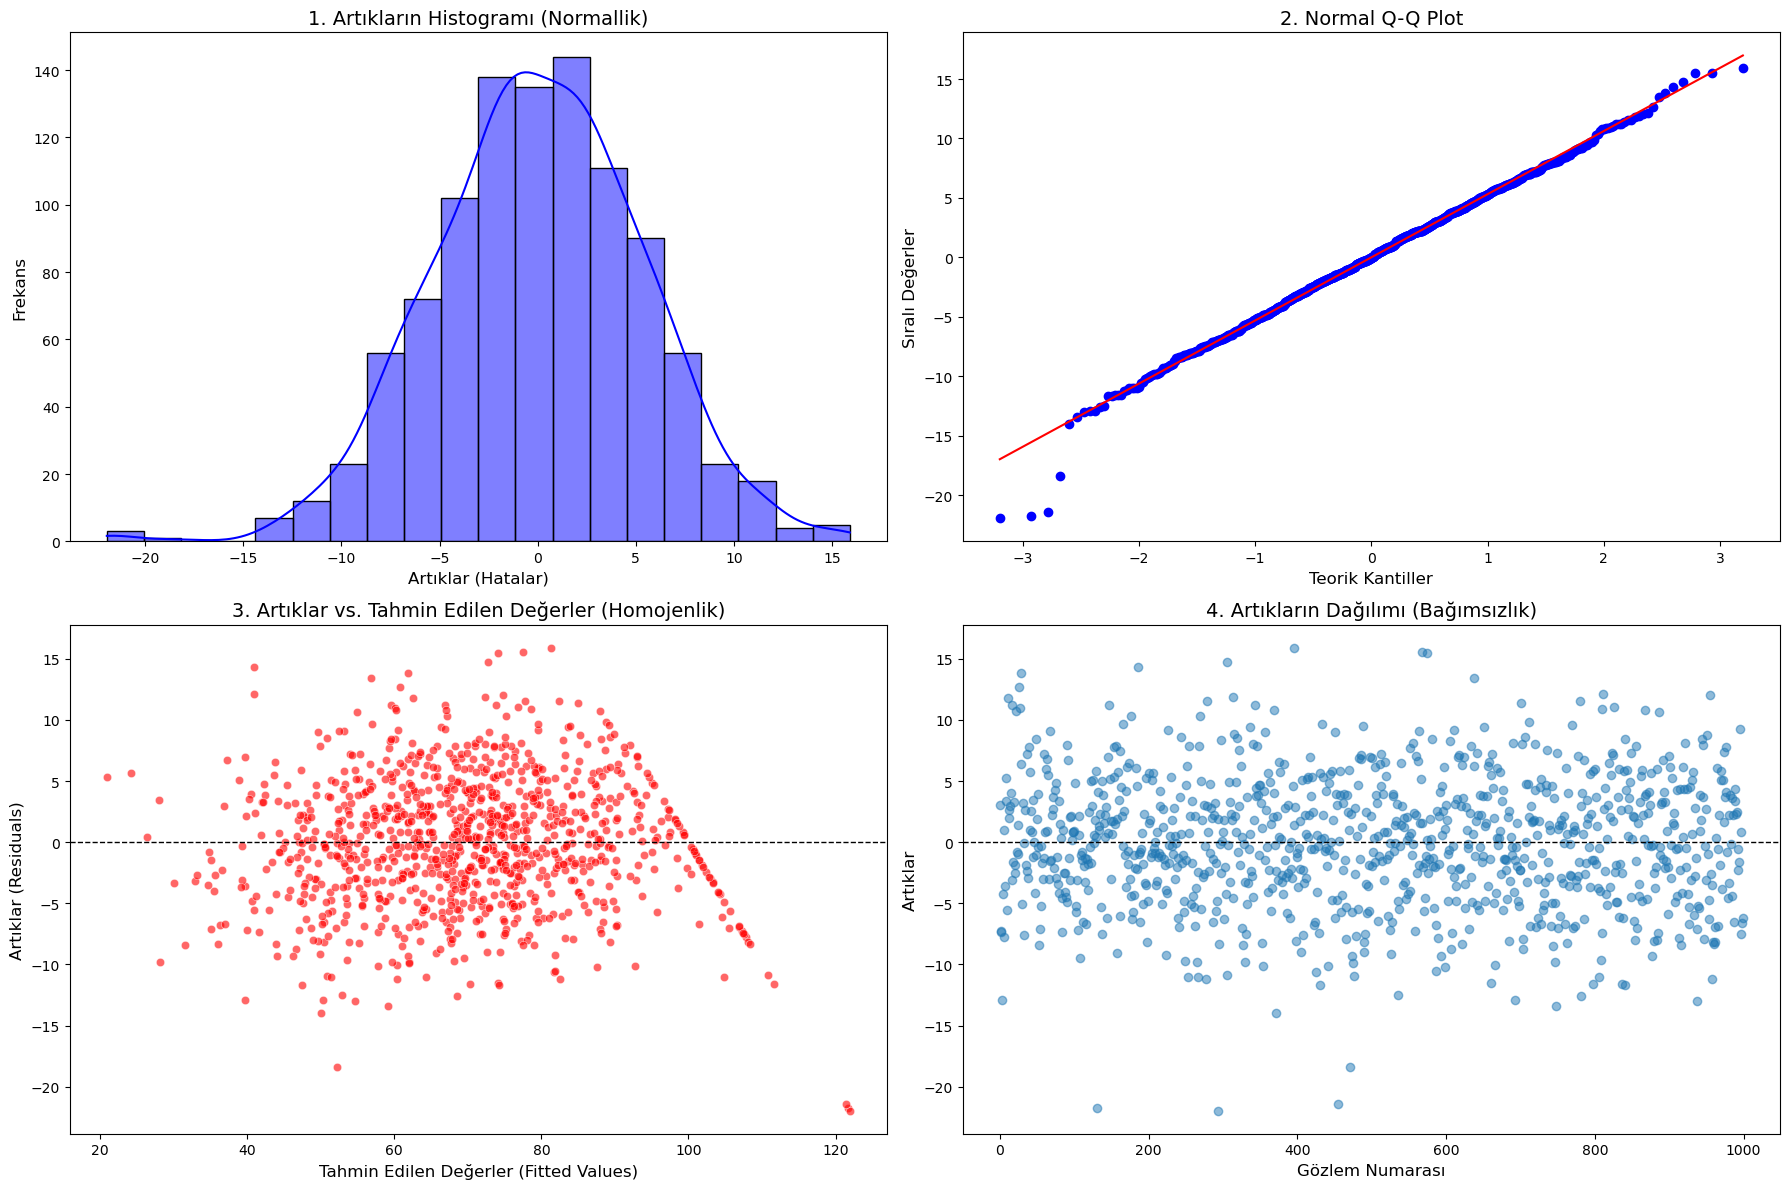

In [19]:


plt.figure(figsize=(18, 12))


plt.subplot(2, 2, 1)
sns.histplot(residuals, kde=True, color='blue', bins=20)
plt.title('1. Artıkların Histogramı (Normallik)', fontsize=14)
plt.xlabel('Artıklar (Hatalar)', fontsize=12)
plt.ylabel('Frekans', fontsize=12)


plt.subplot(2, 2, 2)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('2. Normal Q-Q Plot', fontsize=14)
plt.xlabel('Teorik Kantiller', fontsize=12)
plt.ylabel('Sıralı Değerler', fontsize=12)


plt.subplot(2, 2, 3)
sns.scatterplot(x=fitted_values, y=residuals, color='red', alpha=0.6)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.title('3. Artıklar vs. Tahmin Edilen Değerler (Homojenlik)', fontsize=14)
plt.xlabel('Tahmin Edilen Değerler (Fitted Values)', fontsize=12)
plt.ylabel('Artıklar (Residuals)', fontsize=12)


plt.subplot(2, 2, 4)
plt.plot(residuals, marker='o', linestyle='', alpha=0.5)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.title('4. Artıkların Dağılımı (Bağımsızlık)', fontsize=14)
plt.xlabel('Gözlem Numarası', fontsize=12)
plt.ylabel('Artıklar', fontsize=12)

plt.tight_layout()
plt.show()



In [20]:
from scipy import stats
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson


shapiro_stat, shapiro_p = stats.shapiro(residuals)


bp_test = het_breuschpagan(residuals, final_model.model.exog)
bp_stat = bp_test[0]
bp_p_value = bp_test[1]


dw_stat = durbin_watson(residuals)

print("### VARSAYIM TESTİ SONUÇLARI (Final Model) ###\n")


print(f"1. Normallik Testi (Shapiro-Wilk)")
print(f"   - İstatistik Değeri: {shapiro_stat:.4f}")
print(f"   - P-Değeri         : {shapiro_p:.4f}")
if shapiro_p > 0.05:
    print("   -> SONUÇ: H0 reddedilemez. Hatalar NORMAL dağılıyor. (Varsayım SAĞLANDI ✅)")
else:
    print("   -> SONUÇ: H0 reddedildi. Hatalar normal DAĞILMIYOR. (Varsayım SAĞLANMADI ❌)")

print("-" * 50)


print(f"2. Varyans Homojenliği Testi (Breusch-Pagan)")
print(f"   - LM İstatistik Değeri: {bp_stat:.4f}")
print(f"   - P-Değeri            : {bp_p_value:.4f}")
if bp_p_value > 0.05:
    print("   -> SONUÇ: H0 reddedilemez. Varyans HOMOJENDİR. (Varsayım SAĞLANDI ✅)")
else:
    print("   -> SONUÇ: H0 reddedildi. Heteroskedasite (değişen varyans) VAR. (Varsayım SAĞLANMADI ❌)")

print("-" * 50)


print(f"3. Artıkların Bağımsızlığı (Durbin-Watson)")
print(f"   - Test İstatistiği: {dw_stat:.4f}")
if 1.5 < dw_stat < 2.5:
    print("   -> SONUÇ: Değer 2'ye yakın. Otokorelasyon YOK. (Varsayım SAĞLANDI ✅)")
else:
    print("   -> SONUÇ: Otokorelasyon şüphesi VAR. (Varsayım SAĞLANMADI ❌)")

### VARSAYIM TESTİ SONUÇLARI (Final Model) ###

1. Normallik Testi (Shapiro-Wilk)
   - İstatistik Değeri: 0.9952
   - P-Değeri         : 0.0032
   -> SONUÇ: H0 reddedildi. Hatalar normal DAĞILMIYOR. (Varsayım SAĞLANMADI ❌)
--------------------------------------------------
2. Varyans Homojenliği Testi (Breusch-Pagan)
   - LM İstatistik Değeri: 5.7464
   - P-Değeri            : 0.5697
   -> SONUÇ: H0 reddedilemez. Varyans HOMOJENDİR. (Varsayım SAĞLANDI ✅)
--------------------------------------------------
3. Artıkların Bağımsızlığı (Durbin-Watson)
   - Test İstatistiği: 1.9687
   -> SONUÇ: Değer 2'ye yakın. Otokorelasyon YOK. (Varsayım SAĞLANDI ✅)


In [21]:

original_df = df.copy()
current_X = X.copy()
current_y = y.copy()
removed_indices = []


for i in range(5):
    model = sm.OLS(current_y, current_X).fit()
    stat, p_value = stats.shapiro(model.resid)
    
    if p_value > 0.05:
        break
        
   
    influence = model.get_influence()
    cooks_d = influence.cooks_distance[0]
    
   
    pos_idx = np.argmax(cooks_d)
    
    actual_idx = current_X.index[pos_idx]
    
    removed_indices.append(actual_idx)
    
    
    current_X = current_X.drop(actual_idx)
    current_y = current_y.drop(actual_idx)

print("### SİLİNEN GÖZLEMLER ###")
print(f"Silinen İndeksler: {removed_indices}")

print("\nSilinen Satırların Detayları:")
print(original_df.loc[removed_indices])

### SİLİNEN GÖZLEMLER ###
Silinen İndeksler: [455, np.int64(131)]

Silinen Satırların Detayları:
     age  gender  study_hours_per_day  social_media_hours  netflix_hours  \
455   19    Male               8.3000              3.3000         2.6000   
131   21  Female               7.2000              3.7000         0.0000   

    part_time_job  attendance_percentage  sleep_hours diet_quality  \
455           Yes                86.6000       6.5000         Fair   
131            No               100.0000       7.8000         Good   

     exercise_frequency parental_education_level internet_quality  \
455                   5              High School          Average   
131                   6              High School             Good   

     mental_health_rating extracurricular_participation  exam_score  
455                     9                            No    100.0000  
131                     9                            No    100.0000  


In [31]:

indices_to_drop = [131, 455]
df_clean = df_encoded.drop(indices_to_drop)

print(f"Veri Seti Boyutu: {len(df_encoded)} -> {len(df_clean)} (2 gözlem silindi)")


final_features = [
    'study_hours_per_day', 
    'social_media_hours', 
    'netflix_hours', 
    'attendance_percentage', 
    'sleep_hours', 
    'exercise_frequency', 
    'mental_health_rating'
]

y = df_clean['exam_score']
X = sm.add_constant(df_clean[final_features])

final_model_clean = sm.OLS(y, X).fit()


residuals = final_model_clean.resid


shapiro_stat, shapiro_p = stats.shapiro(residuals)


bp_test = het_breuschpagan(residuals, final_model_clean.model.exog)
bp_stat = bp_test[0]
bp_p = bp_test[1]


dw_stat = durbin_watson(residuals)


print("\n" + "="*50)
print("### TEMİZLENMİŞ MODEL İÇİN VARSAYIM TESTLERİ ###")
print("="*50)

print(f"\n1. Normallik Testi (Shapiro-Wilk)")
print(f"   - P-Değeri: {shapiro_p:.4f}")
if shapiro_p > 0.05:
    print("   -> SONUÇ: ✅ Normallik Varsayımı SAĞLANDI.")
else:
    print("   -> SONUÇ: ❌ Normallik Varsayımı SAĞLANMADI.")

print("-" * 50)

print(f"2. Varyans Homojenliği Testi (Breusch-Pagan)")
print(f"   - P-Değeri: {bp_p:.4f}")
if bp_p > 0.05:
    print("   -> SONUÇ: ✅ Varyans Homojenliği SAĞLANDI.")
else:
    print("   -> SONUÇ: ❌ Varyans Homojenliği SAĞLANMADI.")

print("-" * 50)

print(f"3. Artıkların Bağımsızlığı (Durbin-Watson)")
print(f"   - Değer: {dw_stat:.4f}")
if 1.5 < dw_stat < 2.5:
    print("   -> SONUÇ: ✅ Artıklar Bağımsızdır (Otokorelasyon Yok).")
else:
    print("   -> SONUÇ: ❌ Otokorelasyon Şüphesi.")
    
print("="*50)

Veri Seti Boyutu: 1000 -> 998 (2 gözlem silindi)

### TEMİZLENMİŞ MODEL İÇİN VARSAYIM TESTLERİ ###

1. Normallik Testi (Shapiro-Wilk)
   - P-Değeri: 0.4016
   -> SONUÇ: ✅ Normallik Varsayımı SAĞLANDI.
--------------------------------------------------
2. Varyans Homojenliği Testi (Breusch-Pagan)
   - P-Değeri: 0.9980
   -> SONUÇ: ✅ Varyans Homojenliği SAĞLANDI.
--------------------------------------------------
3. Artıkların Bağımsızlığı (Durbin-Watson)
   - Değer: 1.9573
   -> SONUÇ: ✅ Artıklar Bağımsızdır (Otokorelasyon Yok).


In [23]:

vif_data = pd.DataFrame()
vif_data["Değişken"] = X_final.columns
vif_data["VIF"] = [variance_inflation_factor(X_final.values, i) for i in range(X_final.shape[1])]

print("### FİNAL MODEL İÇİN VIF DEĞERLERİ ###")
print(vif_data)

### FİNAL MODEL İÇİN VIF DEĞERLERİ ###
                Değişken      VIF
0                  const 126.0430
1    study_hours_per_day   1.0036
2     social_media_hours   1.0039
3          netflix_hours   1.0012
4  attendance_percentage   1.0029
5            sleep_hours   1.0018
6     exercise_frequency   1.0027
7   mental_health_rating   1.0005


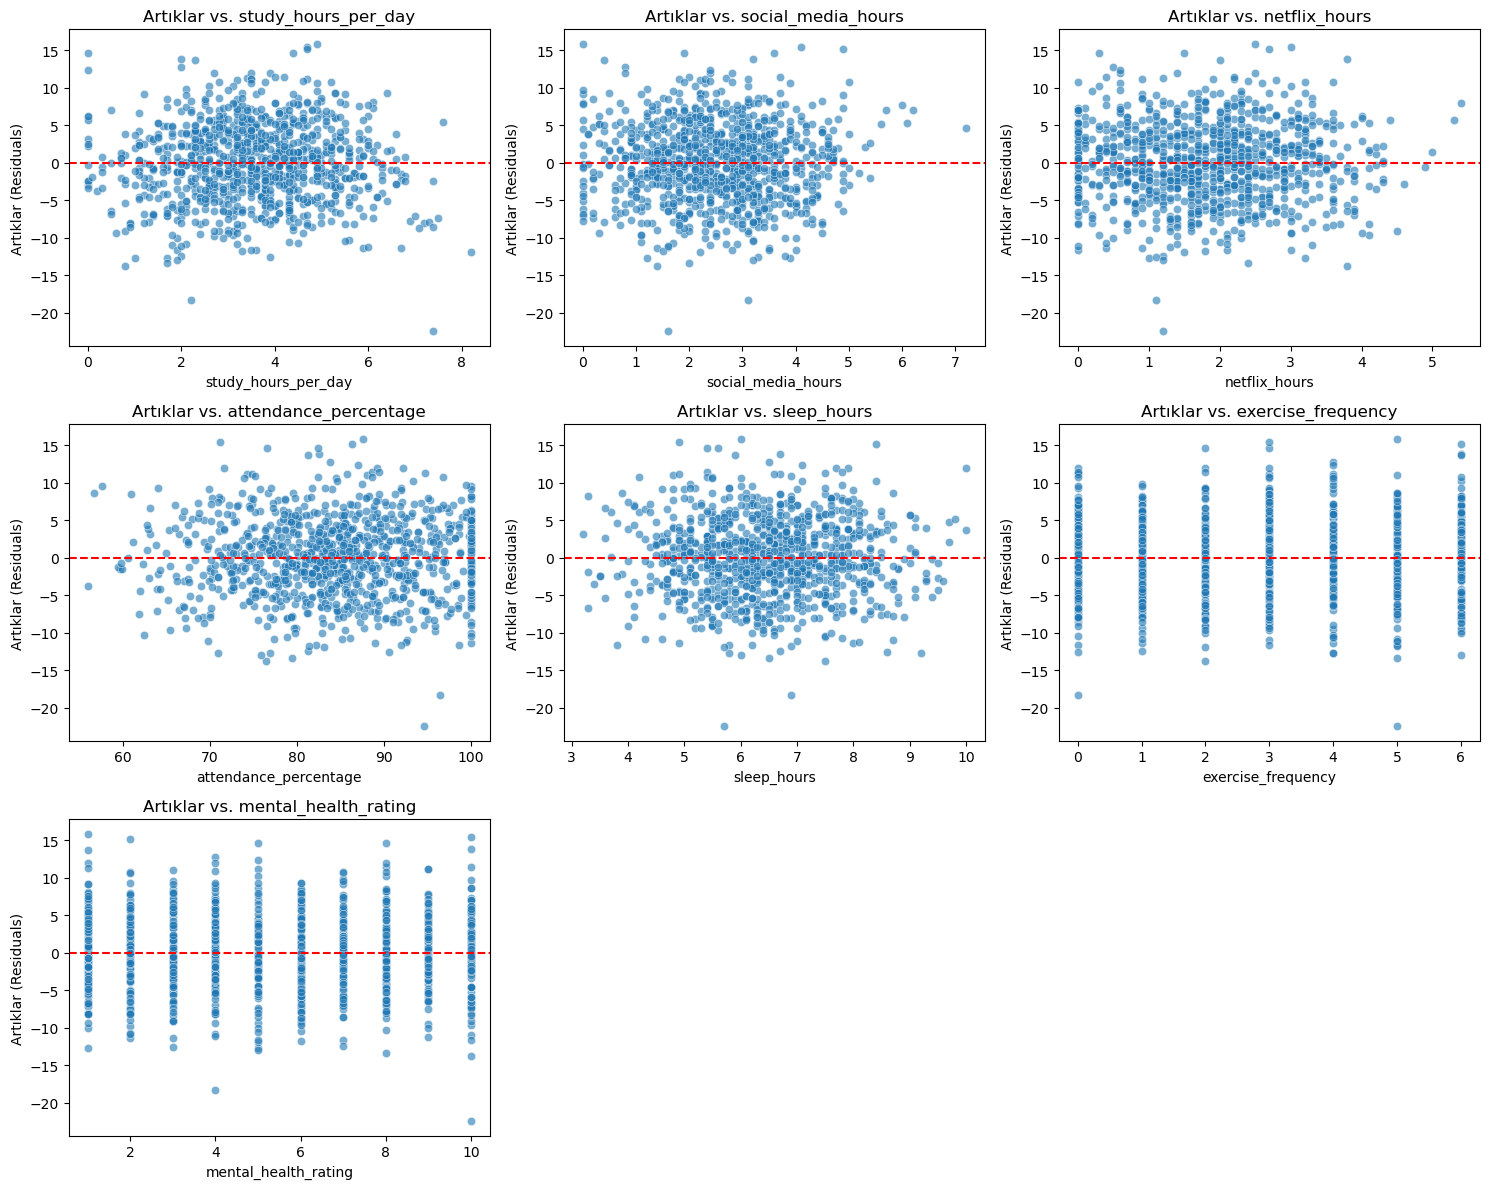

In [24]:

plt.figure(figsize=(15, 12))

for i, col in enumerate(final_features):
    plt.subplot(3, 3, i+1)
    sns.scatterplot(x=df_clean[col], y=residuals, alpha=0.6)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.title(f'Artıklar vs. {col}')
    plt.xlabel(col)
    plt.ylabel('Artıklar (Residuals)')

plt.tight_layout()
plt.show()

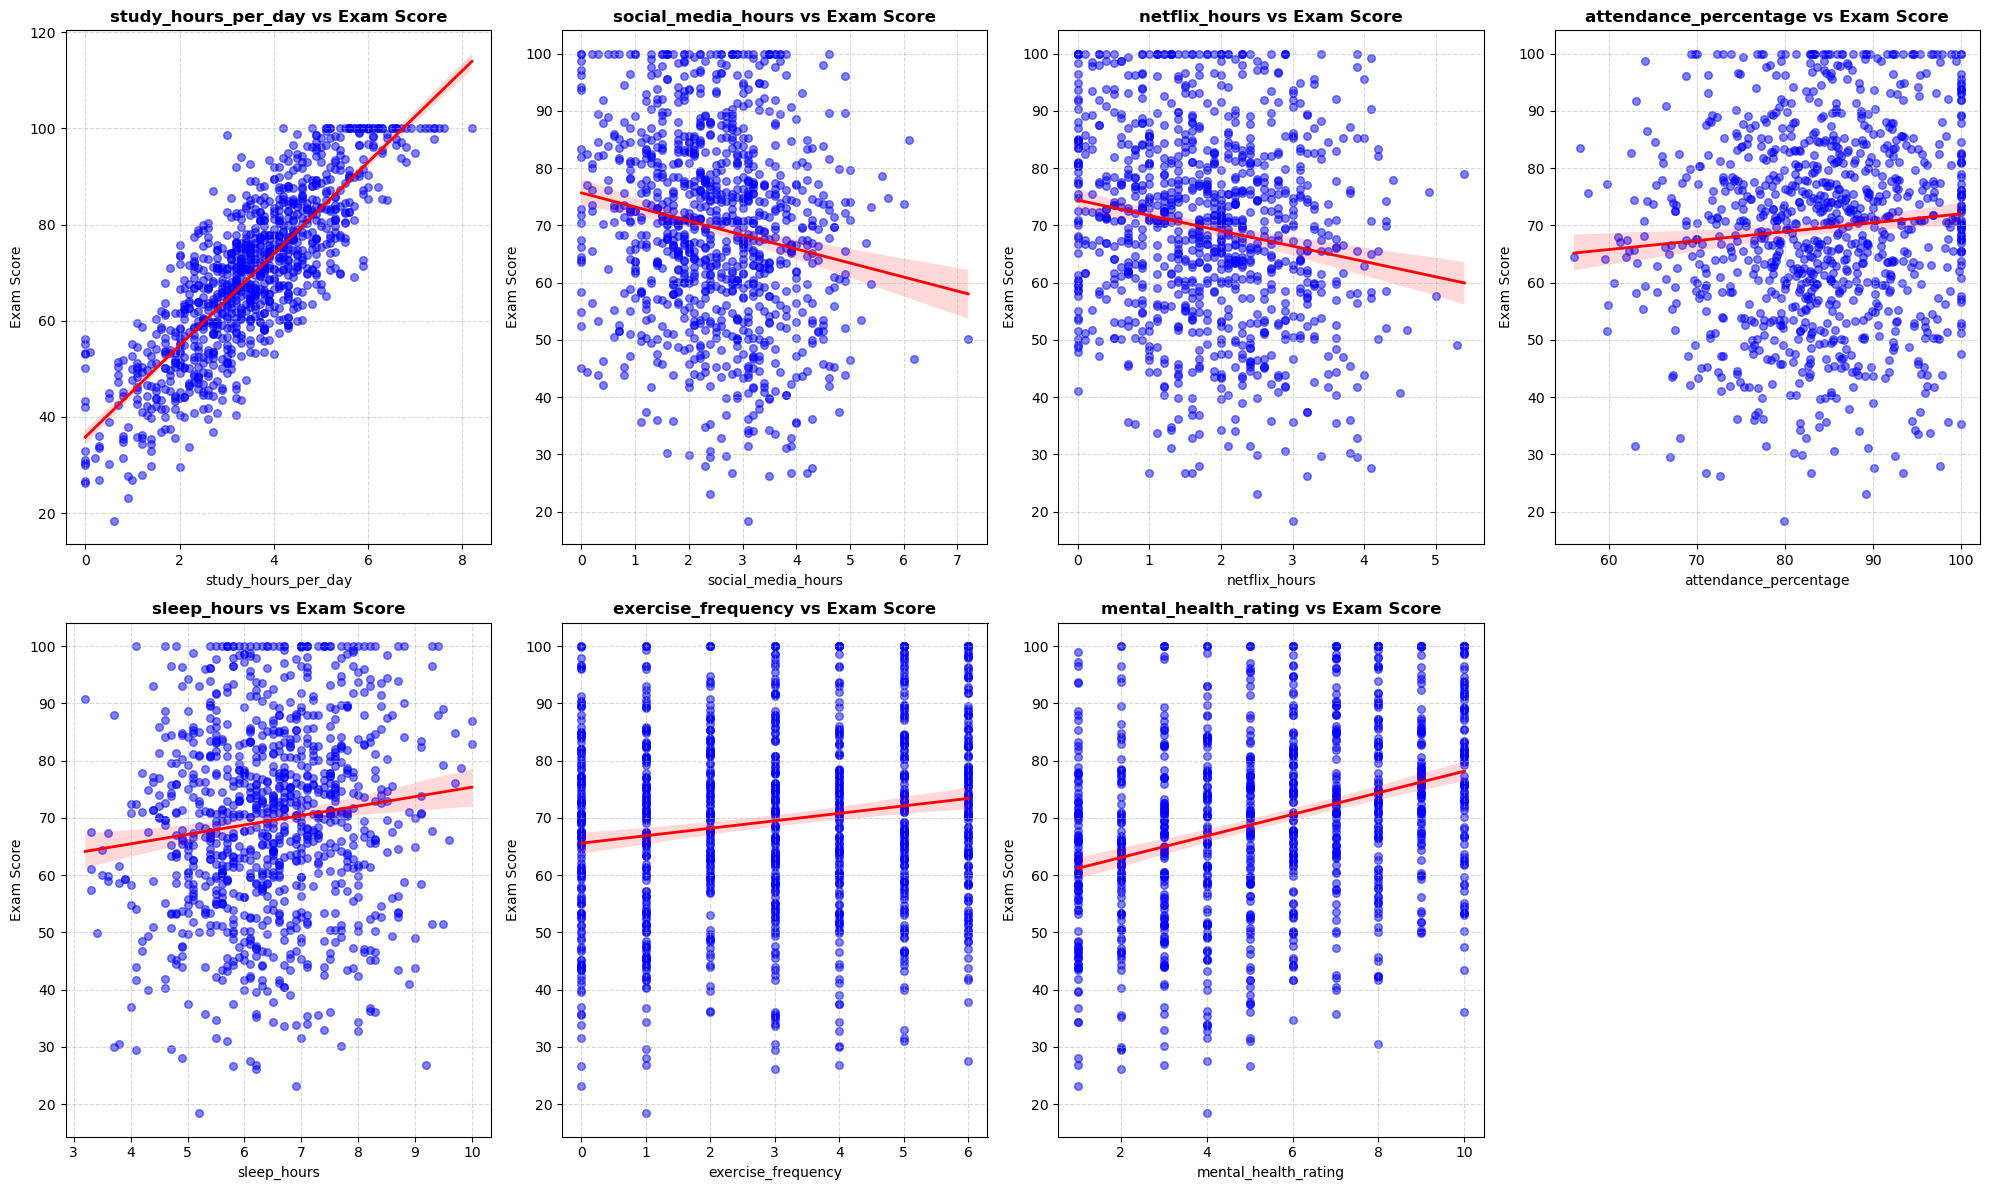

In [25]:
plt.figure(figsize=(20, 12)) 

for i, col in enumerate(final_features):
    plt.subplot(2, 4, i+1) 
    
    
    sns.regplot(
        x=df_clean[col], 
        y=df_clean['exam_score'], 
        line_kws={"color": "red", "linewidth": 2}, 
        scatter_kws={"alpha": 0.5, "s": 30, "color": "blue"} 
    )
    
    plt.title(f"{col} vs Exam Score", fontsize=12, fontweight='bold')
    plt.xlabel(col)
    plt.ylabel("Exam Score")
    plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

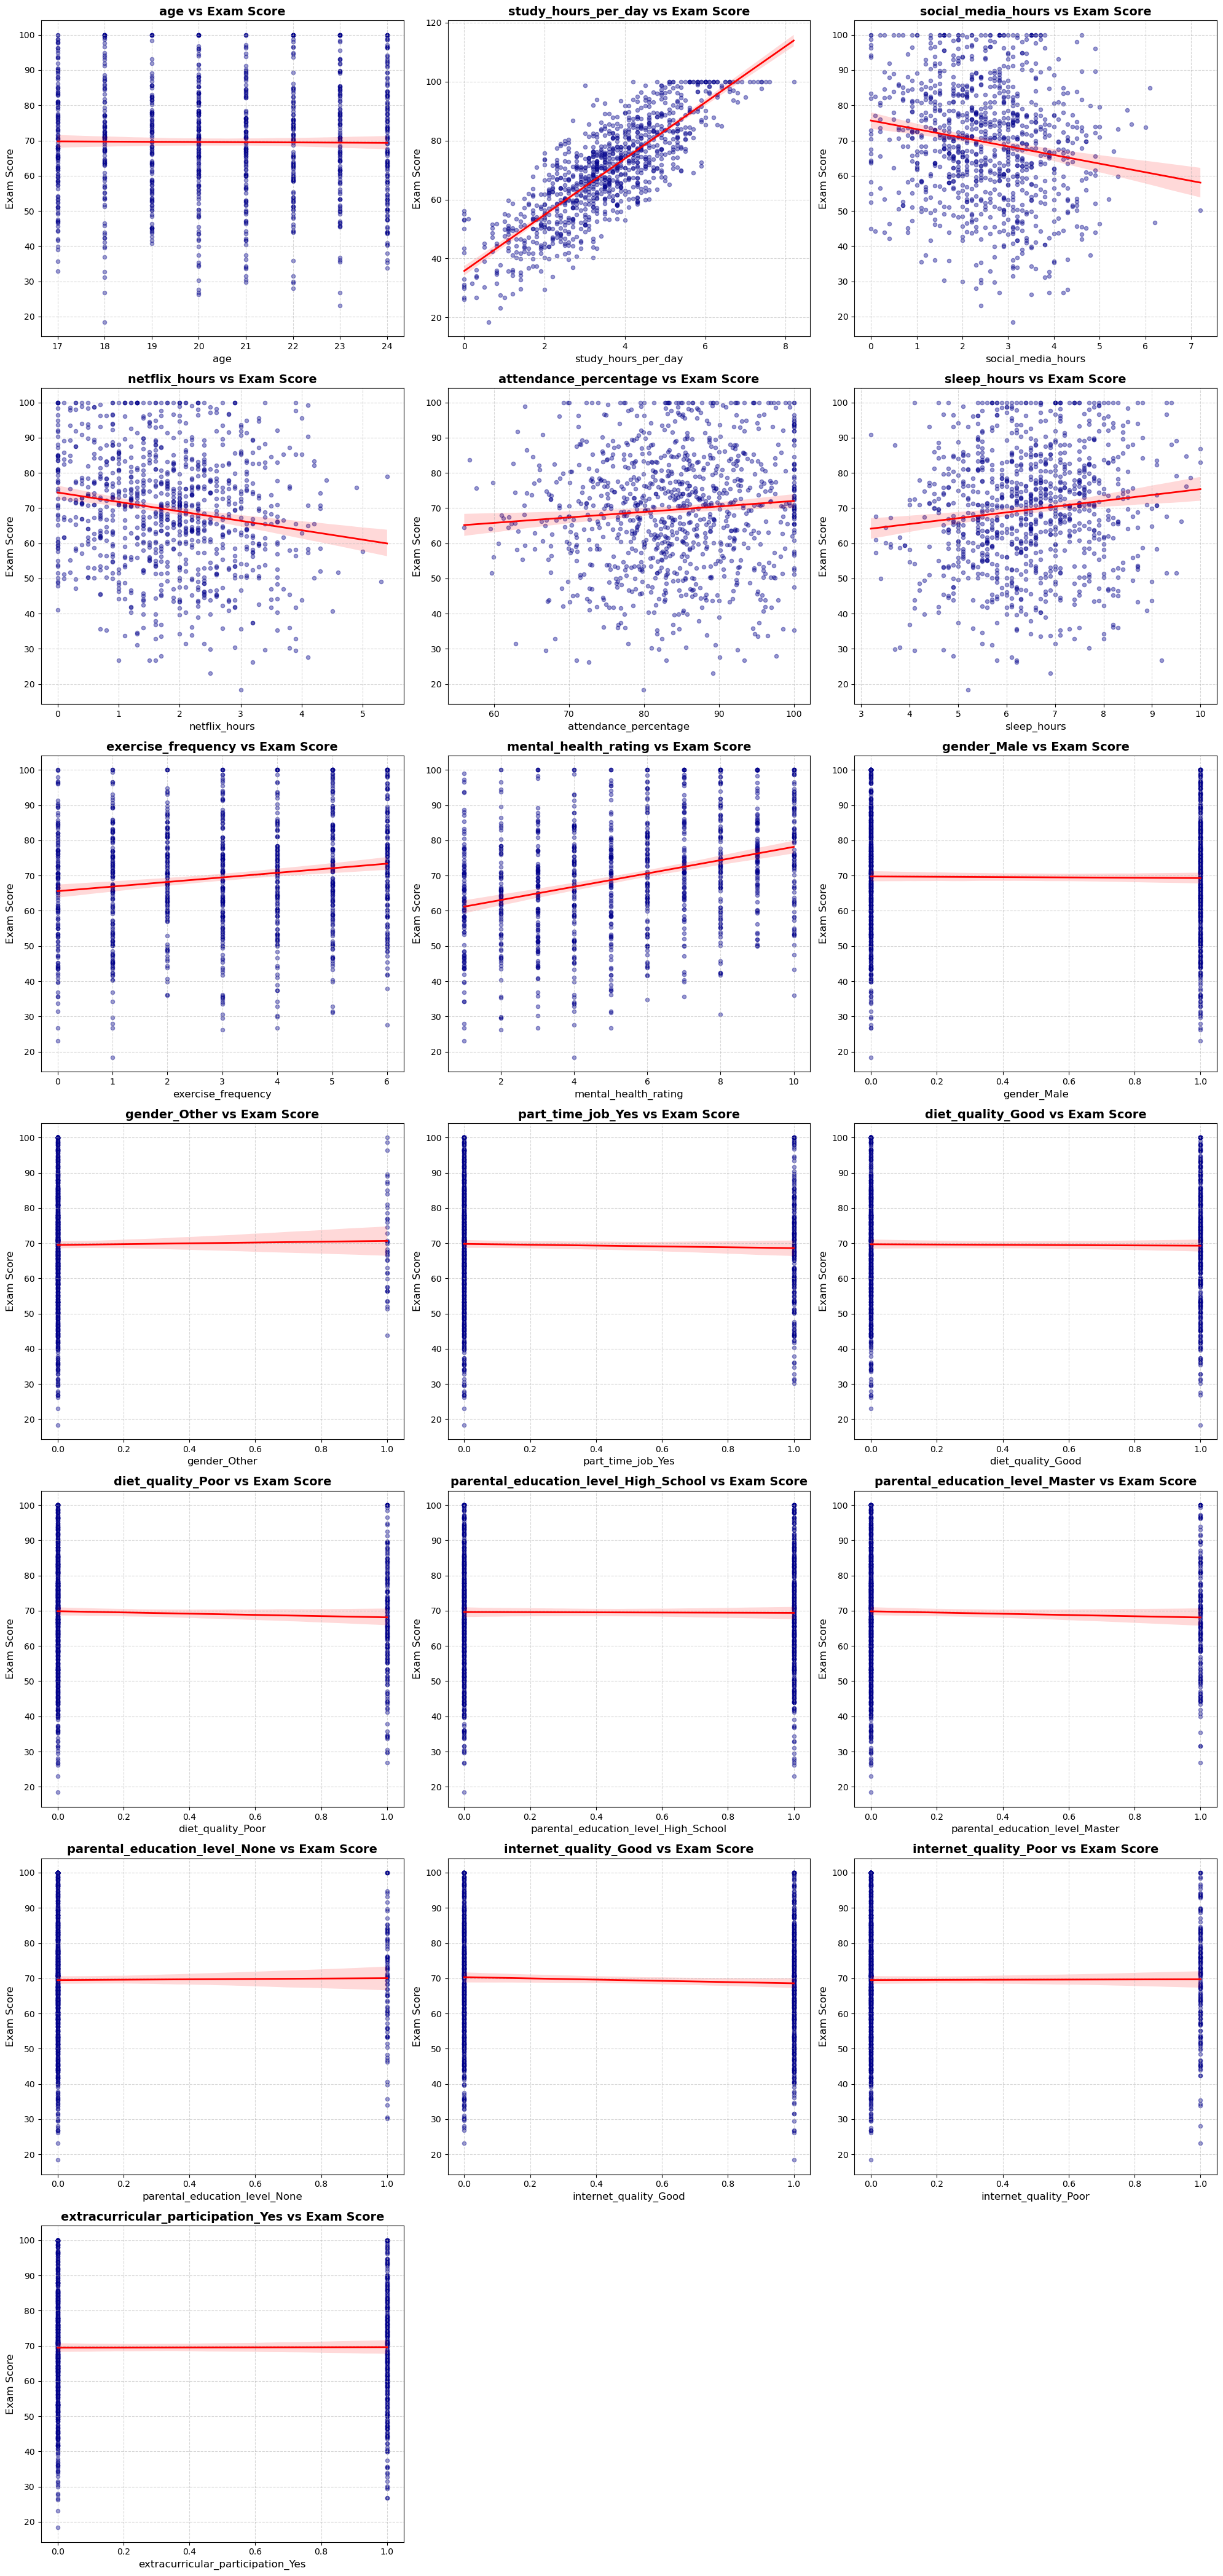

In [26]:
# 3. GRAFİK AYARLARI
# ---------------------------------------------------------
# Izgara boyutunu hesapla (Her satıra 3 grafik sığdıralım)
import math
all_features = df_clean.drop('exam_score', axis=1).columns.tolist()
num_features = len(all_features)
cols = 3
rows = math.ceil(num_features / cols)

plt.figure(figsize=(20, 6 * rows)) # Yükseklik değişken sayısına göre artsın

# 4. DÖNGÜ İLE ÇİZDİRME
# ---------------------------------------------------------
for i, col in enumerate(all_features):
    plt.subplot(rows, cols, i+1)
    
    # Regresyon grafiği
    sns.regplot(
        x=df_clean[col], 
        y=df_clean['exam_score'], 
        line_kws={"color": "red", "linewidth": 2}, # Kırmızı regresyon doğrusu
        scatter_kws={"alpha": 0.4, "s": 20, "color": "darkblue"}, # Noktalar
        ci=95 # %95 Güven Aralığı gölgesi
    )
    
    plt.title(f"{col} vs Exam Score", fontsize=14, fontweight='bold')
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Exam Score", fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

Toplam Veri: 998
Eğitim Seti (Train): 798 gözlem
Test Seti (Test)   : 200 gözlem

### EĞİTİM SETİ İLE KURULAN MODEL ÖZETİ ###
                            OLS Regression Results                            
Dep. Variable:             exam_score   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     1079.
Date:                Sat, 20 Dec 2025   Prob (F-statistic):               0.00
Time:                        17:21:57   Log-Likelihood:                -2442.5
No. Observations:                 798   AIC:                             4901.
Df Residuals:                     790   BIC:                             4938.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0

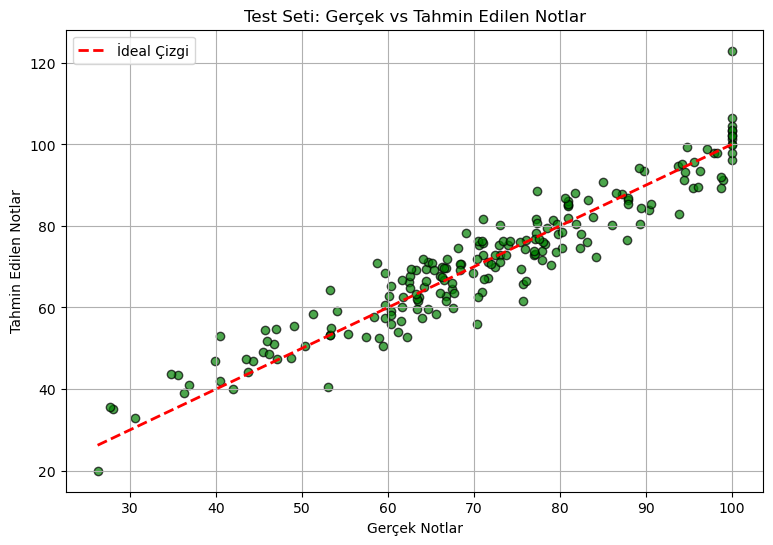

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Toplam Veri: {len(df_clean)}")
print(f"Eğitim Seti (Train): {len(X_train)} gözlem")
print(f"Test Seti (Test)   : {len(X_test)} gözlem")


print("\n### EĞİTİM SETİ İLE KURULAN MODEL ÖZETİ ###")
model_train = sm.OLS(y_train, X_train).fit()
print(model_train.summary())


y_pred_test = model_train.predict(X_test)
y_pred_train = model_train.predict(X_train) 


rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_test = r2_score(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)

print("\n" + "="*50)
print("### PERFORMANS SONUÇLARI ###")
print(f"Eğitim (Train) R-Kare : {r2_train:.4f}")
print(f"Test (Holdout) R-Kare : {r2_test:.4f}")
print(f"Test RMSE (Hata Payı) : {rmse_test:.4f}")
print("="*50)


plt.figure(figsize=(9, 6))
plt.scatter(y_test, y_pred_test, alpha=0.7, color='green', edgecolors='black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='İdeal Çizgi')
plt.title('Test Seti: Gerçek vs Tahmin Edilen Notlar')
plt.xlabel('Gerçek Notlar')
plt.ylabel('Tahmin Edilen Notlar')
plt.legend()
plt.grid(True)
plt.show()

In [34]:


import pandas as pd
import statsmodels.api as sm

# (Modelin zaten kurulu olduğunu varsayıyoruz: model_train veya final_model)
# Eğer modeliniz 'model_train' ismindeyse onu kullanın.

print("### 1. MODEL KATSAYILARI İÇİN %95 GÜVEN ARALIKLARI ###")
print("-" * 60)
# Katsayılar ve Güven Aralıklarını birleştirip tablo yapalım
conf_int = model_train.conf_int(alpha=0.05)
conf_int.columns = ['Alt Sınır (%2.5)', 'Üst Sınır (%97.5)']
conf_int['Katsayı (Coef)'] = model_train.params
# Sıralamayı değiştirelim: Katsayı başa gelsin
conf_int = conf_int[['Katsayı (Coef)', 'Alt Sınır (%2.5)', 'Üst Sınır (%97.5)']]

print(conf_int)
print("-" * 60)
print("YORUM: Eğer bir aralık 0 değerini KAPSAMIYORSA, o değişken istatistiksel olarak anlamlıdır.")


print("\n\n### 2. ÖRNEK ÖĞRENCİ TAHMİNLERİ VE ARALIKLARI ###")
print("-" * 60)


senaryolar = pd.DataFrame({
    'const': [1.0, 1.0, 1.0], 
    'study_hours_per_day': [8.0, 4.0, 1.0],      
    'social_media_hours': [1.0, 3.0, 6.0],       
    'netflix_hours': [0.0, 2.0, 4.0],            
    'attendance_percentage': [98.0, 80.0, 50.0], 
    'sleep_hours': [8.0, 7.0, 5.0],              
    'exercise_frequency': [4.0, 2.0, 0.0],       
    'mental_health_rating': [9.0, 6.0, 3.0]      
}, index=['Örnek A (İdeal Öğrenci)', 'Örnek B (Ortalama Öğrenci)', 'Örnek C (Riskli Öğrenci)'])


predictions = model_train.get_prediction(senaryolar)


pred_summary = predictions.summary_frame(alpha=0.05)


for i, row in pred_summary.iterrows():
    
    tahmin = min(max(row['mean'], 0), 100)
    alt_sinir = min(max(row['obs_ci_lower'], 0), 100)
    ust_sinir = min(max(row['obs_ci_upper'], 0), 100)
    
    print(f"Profil: {i}")
    print(f"   -> TAHMİN EDİLEN NOT: {tahmin:.2f}")
    print(f"   -> Tahmin Aralığı (%95): [{alt_sinir:.2f} - {ust_sinir:.2f}]")
    print(f"      (Bu öğrenci %95 ihtimalle bu aralıkta not alacaktır)")
    print("-" * 60)

### 1. MODEL KATSAYILARI İÇİN %95 GÜVEN ARALIKLARI ###
------------------------------------------------------------
                       Katsayı (Coef)  Alt Sınır (%2.5)  Üst Sınır (%97.5)
const                          3.5611           -0.4638             7.5861
study_hours_per_day            9.7348            9.4844             9.9851
social_media_hours            -2.4637           -2.7683            -2.1591
netflix_hours                 -2.4187           -2.7525            -2.0848
attendance_percentage          0.1685            0.1301             0.2069
sleep_hours                    1.9783            1.6839             2.2727
exercise_frequency             1.4217            1.2441             1.5994
mental_health_rating           1.9914            1.8648             2.1181
------------------------------------------------------------
YORUM: Eğer bir aralık 0 değerini KAPSAMIYORSA, o değişken istatistiksel olarak anlamlıdır.


### 2. ÖRNEK ÖĞRENCİ TAHMİNLERİ VE ARALIKLARI ###
----